In [92]:
!pip install -U scikit-learn

<div class="alert alert-success">
  <b> ✔️Комментарий ревьюера ✔️</b>

Привет, Мадина! Меня зовут Михаил, я буду проверять твой проект. Предлагаю общаться на 'ты' :)
Однако, если это неудобно - сообщи, и мы перейдем на 'Вы'. Моя главная цель —  поделиться с тобой своим опытом и помочь тебе стать крутым специалистом, а не только указать на совершенные тобой ошибки.

Видно, что к проекту приложен большой труд. 

Есть несколько аспектов, которые **требуют** твоего **внимания**. Комментарии по ним помечены красным цветом и символам ❌. После их доработки проект будет принят, осталось совсем немного :) 
    

Давай работать над проектом в диалоге: если **ты что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Мне будет легче отследить изменения, если ты будешь использовать синюю форму, которую я прикреплю ниже. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 



Жду проект на повторное ревью. Успехов в изучении!



</div>
<div class="alert alert-block alert-danger"> <b>❌ Комментарий ревьюера ❌</b> 
    Так я выделяю моменты, которые требуют особого внимания. Нужно будет учесть их и внести корректировки в свою работу. </div>
<div class="alert alert-block alert-warning"> <b>⚠️ Комментарий ревьюера ⚠️</b> 
    Желтым я отмечу рекомендации, которые, могут быть полезными при твоей работе. Они носят рекомендационный характер, но будет классно, если ты будешь учитывать их при работе.</div>
<div class="alert alert-block alert-success"> <b>✔️ Комментарий ревьюера ✔️</b>
    Так я выделяю удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>
<div class="alert alert-block alert-info">
    
А в таком блоке ты можешь оставить комментарии для меня 
    
</div>

# Сборный проект 2
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам помогает машинное обучение, с помощью которого получается быстрее и точнее отвечать на вопросы бизнеса.

Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   



   
   Здесь стоит декомпозировать нашу задачу - можно написать краткий план работ, в котором ты отразишь необходимые шаги для выполнения - навык составления ТЗ пригодится в будущем

</div>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

try:
    import shap
except ImportError:
    !pip install shap
    import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, mean_squared_error
try:
    from phik.report import plot_correlation_matrix
    from phik import phik_matrix
except ImportError:
    !pip install phik
    from phik.report import plot_correlation_matrix
    from phik import phik_matrix

warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

RANDOM_STATE = 42
TEST_SIZE = 0.25


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
    

    
Если при импорте функций из пакета через запятую больше трех-четырех позиций (а длина строки больше 90 символов), в таком случае было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a> - не оставлять длинных строк.

Такое оформление предпочтительнее:    
    
`from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder
)`
   Также обращаю твое внимание - здесь есть импорты модулей, которые ты не используешь далее по ходу проекта. Это может приводить к ошибкам, забивать память в окружении. Поэтому будет здорово, если ты удалишь лишние.
        
</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Здорово, что выносишь константы по стандарту pep8 после импорта библиотек 👍

</div>


# Первая задача

## Загрузка данных

In [3]:
try:
  X_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')

  y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

  X_test = pd.read_csv('/datasets/test_features.csv')


except:

  X_train = pd.read_csv('/content/train_job_satisfaction_rate.csv')

  y_test = pd.read_csv('/content/test_target_job_satisfaction_rate.csv')

  X_test= pd.read_csv('/content/test_features.csv')

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Молодец, что используешь конструкцию try - except, в блоке except также рекомендую отлавливать ошибку `FileNotFoundError`.
При загрузке файлов можно также устанавливать столбец-индекс (для наших задач - очень хорошее решение, чтобы далее он не участвовал в анализе)  

</div>


In [4]:
X_train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:
y_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [7]:
# Функция получения общей информации о датасете, о дубликатах и пропусках.
def information(df):
    df.info();
    print('\nКоличество дубликатов:',df.duplicated().sum(),'\n')
    print('Количество пропусков:\n',df.isna().sum())

In [8]:
information(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB

Количество дубликатов: 0 

Количество пропусков:
 id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary        

In [9]:
information(X_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB

Количество дубликатов: 0 

Количество пропусков:
 id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo    

In [10]:
information(y_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB

Количество дубликатов: 0 

Количество пропусков:
 id                       0
job_satisfaction_rate    0
dtype: int64


### Вывод

**Тренировочная выборка:**

- Количество строк: 4000
- Пропущенные значения: имеются в колонках с отделом и занимаемой должностью
- Дубликаты: отсутствуют
- Форматы данных: соответствуют ожиданиям

**Тестовая выборка с входными данными:**

- Количество строк: 2000
- Пропущенные значения: имеются в колонках с отделом и занимаемой должностью
- Дубликаты: отсутствуют
- Форматы данных: соответствуют ожиданиям

**Тестовая выборка с целевым признаком:**

- Количество строк: 2000
- Пропущенные значения: отсутствуют
- Дубликаты: отсутствуют
- Форматы данных: соответствуют ожиданиям
- Пропущенные значения будут обработаны на этапе подготовки данных в пайплайне.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо. Выборки загружены, в некоторых замечены пропуски. Здорово, что используешь функции и стараешься автоматизировать работу. Приступим к предобработке

</div>

## Предобработка данных

In [11]:
X_train.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

In [12]:
X_test.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

In [13]:
y_test.columns

Index(['id', 'job_satisfaction_rate'], dtype='object')

In [14]:
def display_value_counts_objects(df, df_name):
    for column in df.select_dtypes(include=['object']).columns:
        print(f"Column: {column}")
        print(df[column].unique())
        print("\n")


# Вывод value_counts для каждого столбца в X_train и X_test
display_value_counts_objects(X_train, 'X_train')

Column: dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]


Column: level
['junior' 'middle' 'sinior' nan]


Column: workload
['medium' 'high' 'low']


Column: last_year_promo
['no' 'yes']


Column: last_year_violations
['no' 'yes']




In [15]:
display_value_counts_objects(X_test, 'X_test')

Column: dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']


Column: level
['junior' 'middle' 'sinior' nan]


Column: workload
['medium' 'low' 'high' ' ']


Column: last_year_promo
['no' 'yes']


Column: last_year_violations
['no' 'yes']




In [16]:
# Замена пустых строк на NaN в X_train
X_train.replace(' ', np.nan, inplace=True)

# Замена пустых строк на NaN в X_test
X_test.replace(' ', np.nan, inplace=True)


In [17]:
display_value_counts_objects(X_test, 'X_test')

Column: dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]


Column: level
['junior' 'middle' 'sinior' nan]


Column: workload
['medium' 'low' 'high' nan]


Column: last_year_promo
['no' 'yes']


Column: last_year_violations
['no' 'yes']




In [18]:
X_train.replace('sinior', 'senior', inplace=True)
X_test.replace('sinior', 'senior', inplace=True)

### Вывод
Ошибки устранены
- " " заменили на nan


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо👍 Неявные пропуски найдены и устранены

</div>


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Обрати внимание на грамматическую ошибку  в `sinior` - это не влияет на прогресс проекта, но в последующих проектах старайся такое отлавливать и исправлять.

</div>




## Исследовательский анализ данных

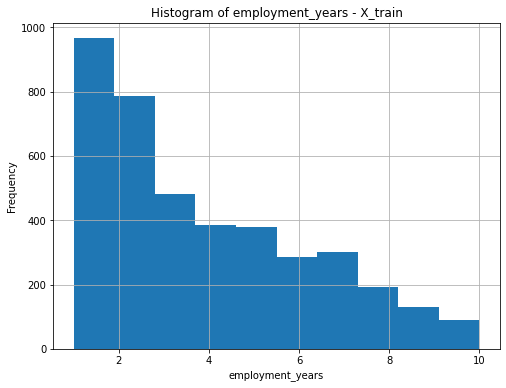

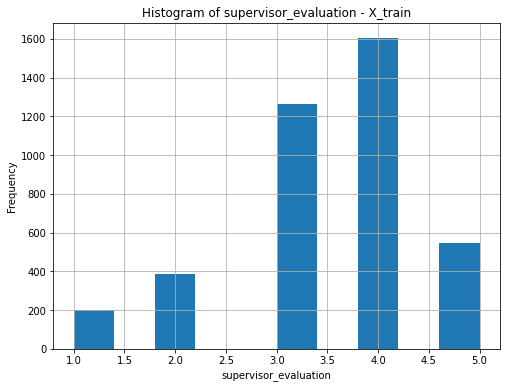

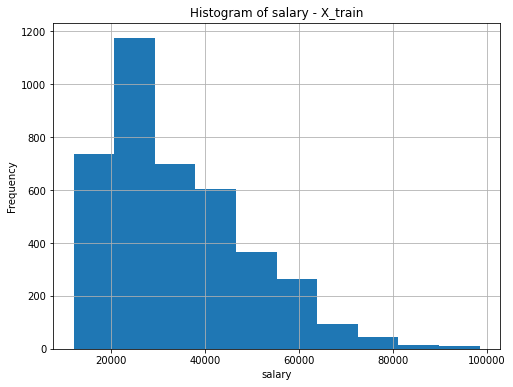

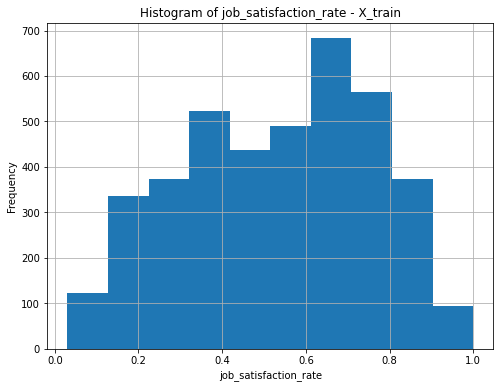

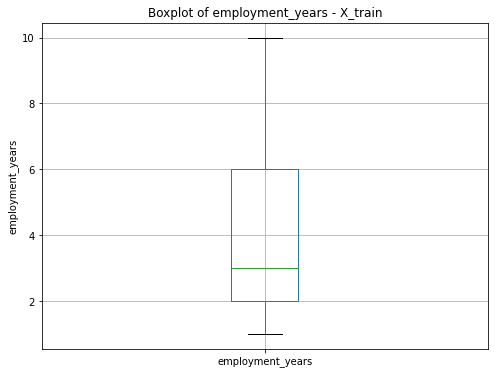

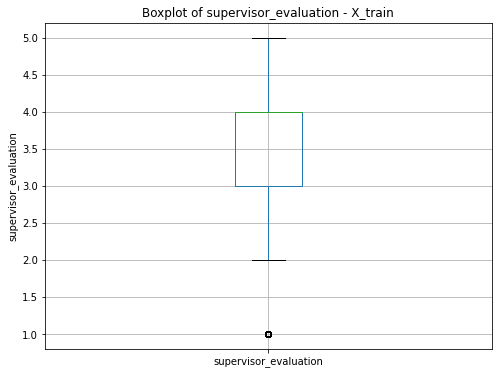

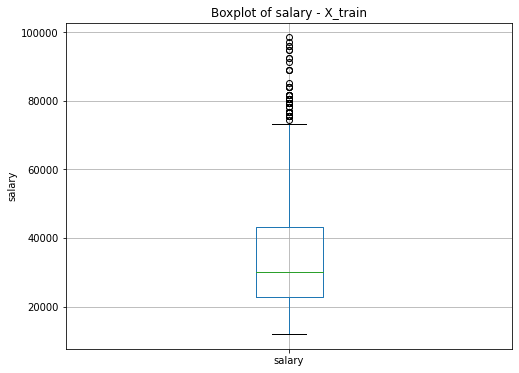

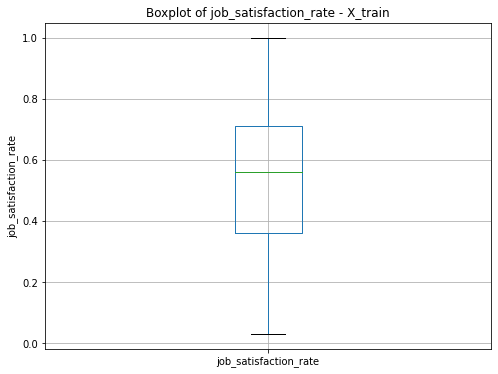

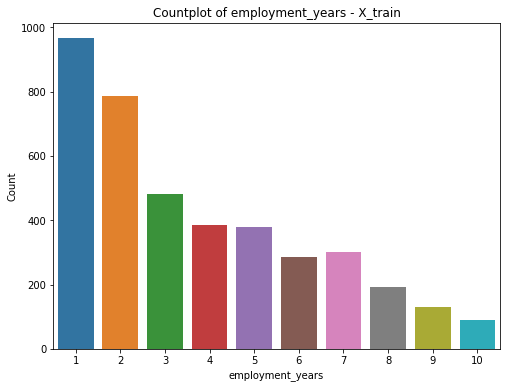

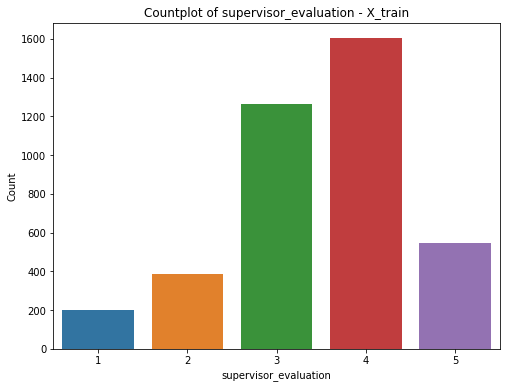

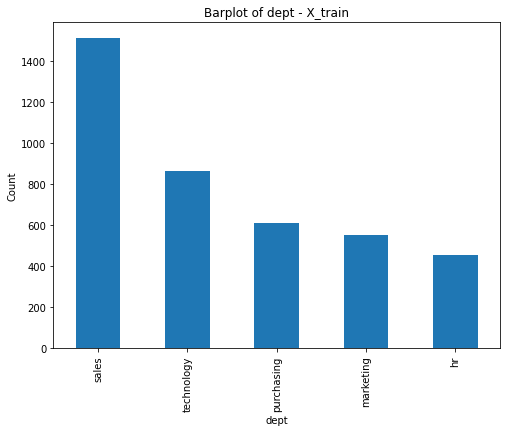

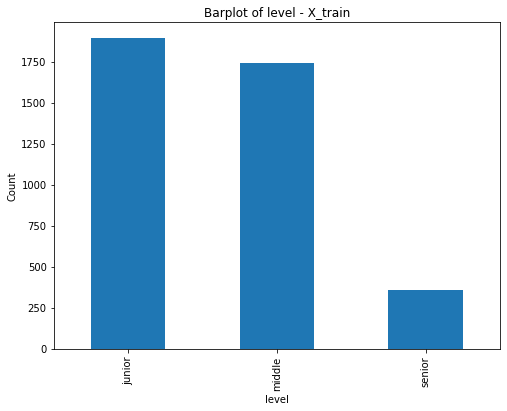

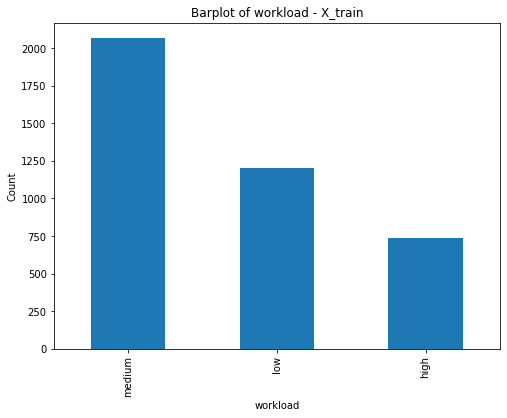

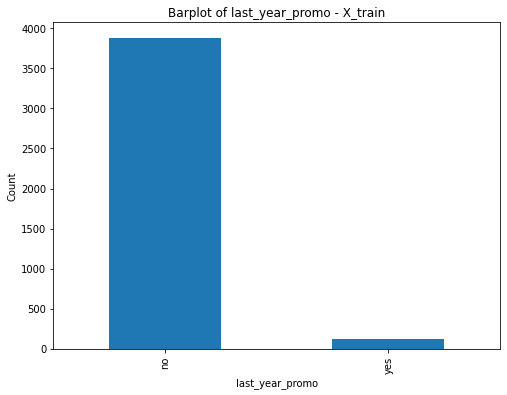

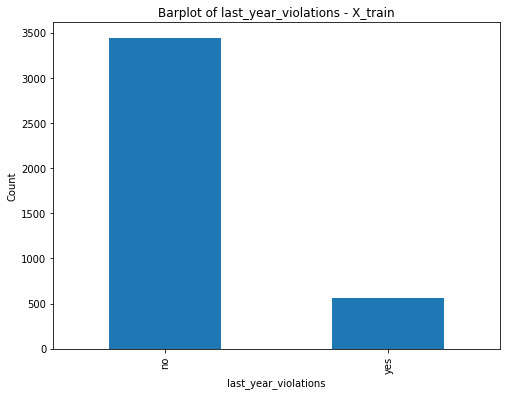

In [19]:
def visualize_data(df, df_name):
    # Выбираем количественные и категориальные признаки
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Исключаем id из анализа ящиками с усами
    numeric_columns = numeric_columns.drop('id', errors='ignore')
    
    # Строим гистограммы для количественных признаков
    for col in numeric_columns:
        plt.figure(figsize=(8, 6))
        df[col].hist()
        plt.title(f'Histogram of {col} - {df_name}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Строим ящики с усами для количественных признаков
    for col in numeric_columns:
        plt.figure(figsize=(8, 6))
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col} - {df_name}')
        plt.ylabel(col)
        plt.show()
    
    # Строим countplot для дискретных числовых признаков
    discrete_columns = ['employment_years', 'supervisor_evaluation']
    for col in discrete_columns:
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=col)
            plt.title(f'Countplot of {col} - {df_name}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

    # Строим столбчатые диаграммы для категориальных признаков
    for col in categorical_columns:
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Barplot of {col} - {df_name}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

# Пример применения функции к тренировочному набору данных
visualize_data(X_train, 'X_train')

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Анализ `id` сам по себе не имеет никакой ценности - это просто случайный набор чисел, описывающий номер работинка в базе, и какой-то информационной ценности в нём нет. Поэтому стоит удалить этот анализ.

</div>




<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   1. Для анализа дискретных признаков `employment_years` и `supervisor_evaluation` не подходит обычная гистограмма. для их анализа нужнен тип графиков, который на каждое уникальные значение признака строит свою корзину. Например, можно использовать `sns.countplot`.
    
2. С помощью ящика с усами не стоит анализировать `id` - это по сути больше категориальный признак, хоть и представлен в численном виде. Из ящика с усами `id` нужно убрать.

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено👍

</div>

</div>


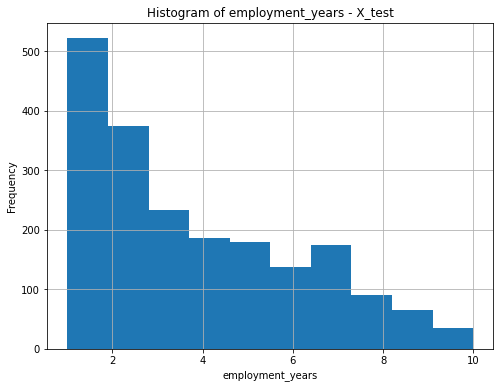

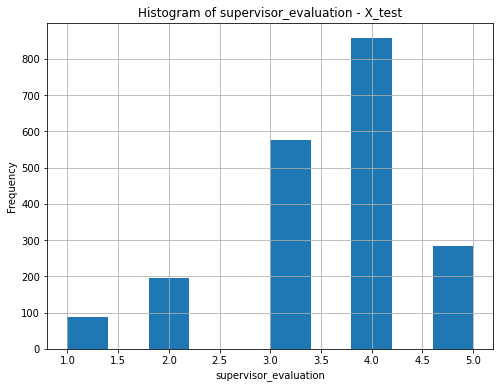

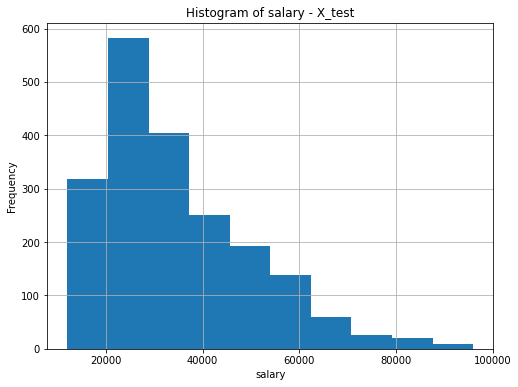

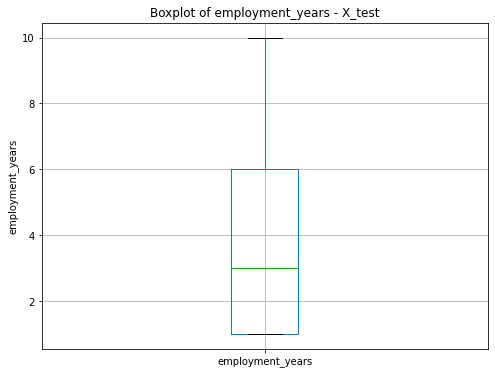

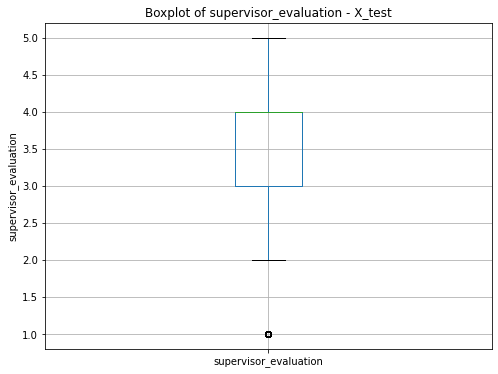

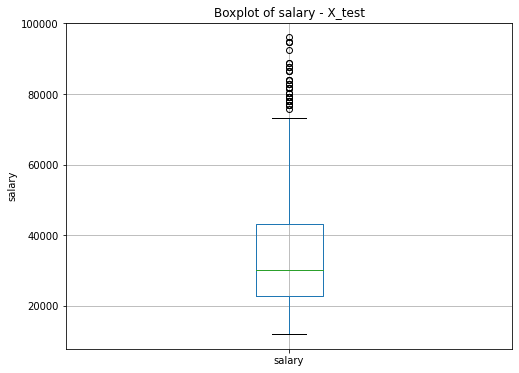

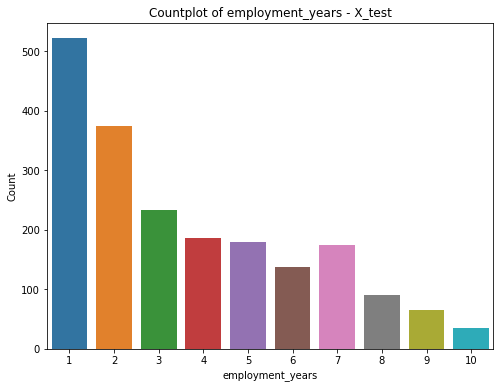

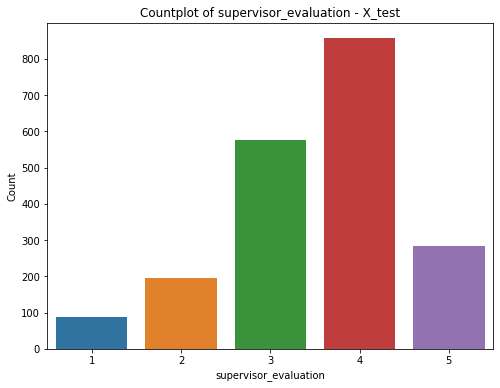

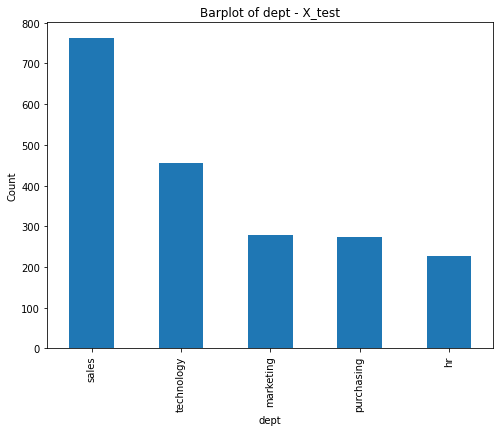

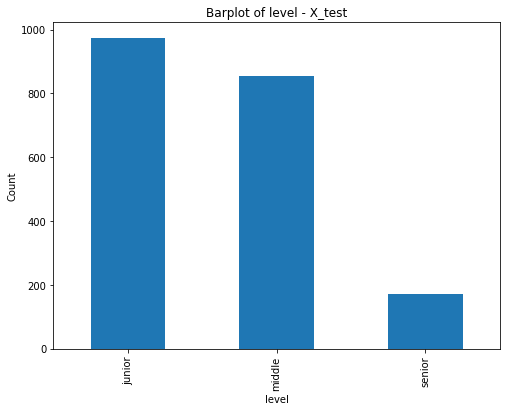

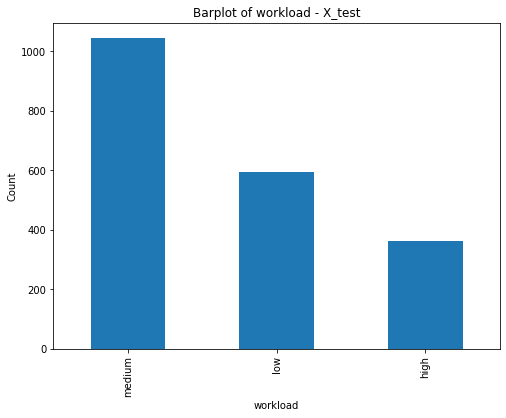

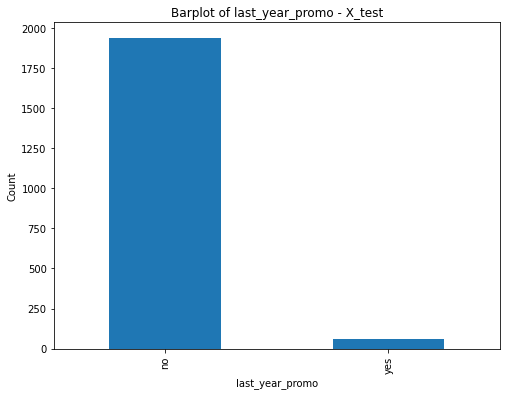

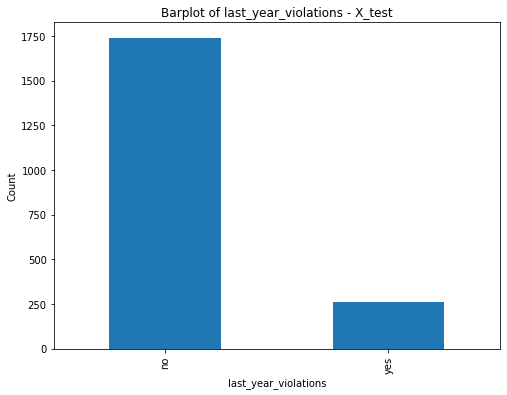

In [20]:
visualize_data(X_test, 'X_test')

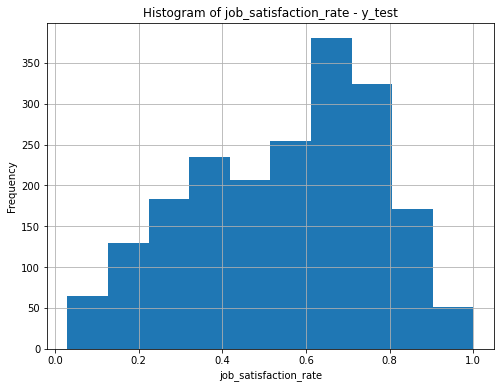

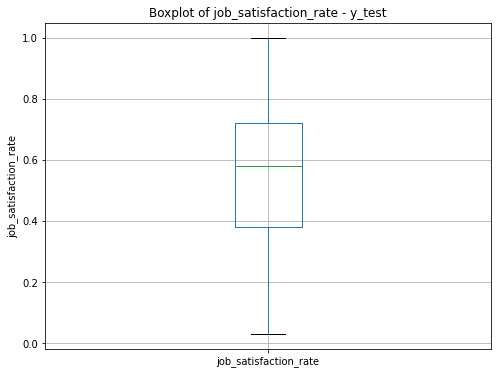

In [21]:
visualize_data(y_test, 'y_test')

interval columns not set, guessing: ['id', 'employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


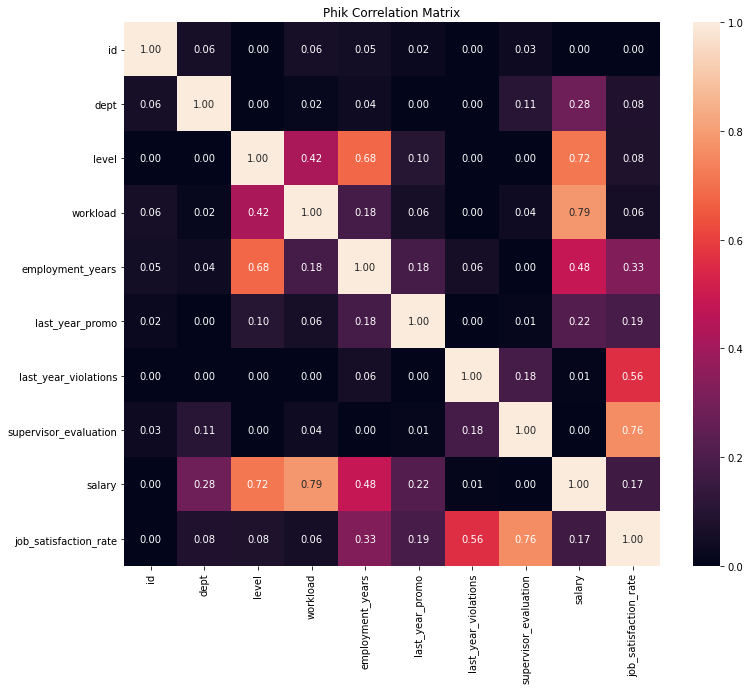

In [22]:
def correlation_analysis(df):
    phik_corr_matrix = df.phik_matrix()
    plt.figure(figsize=(12, 10))
    sns.heatmap(phik_corr_matrix, annot=True, fmt=".2f")
    plt.title('Phik Correlation Matrix')
    plt.show()
    
correlation_analysis(X_train)

interval columns not set, guessing: ['id', 'employment_years', 'supervisor_evaluation', 'salary']


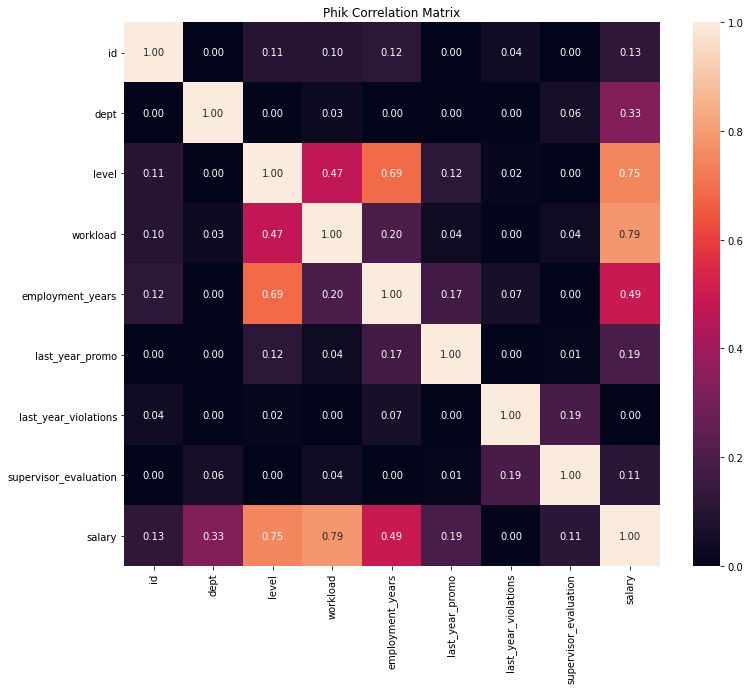

In [23]:
correlation_analysis(X_test)

interval columns not set, guessing: ['id', 'job_satisfaction_rate']


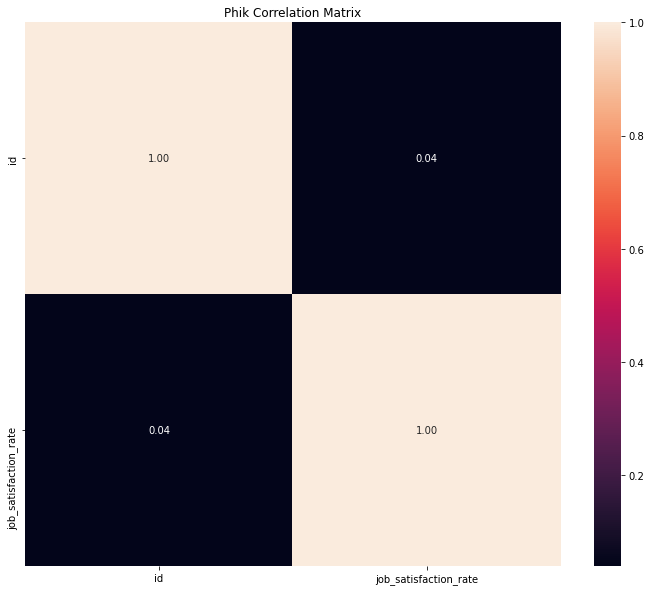

In [24]:
correlation_analysis(y_test)

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Молодец, что использовала phik для корреляционного анализа, однако, по нему есть следующие замечания:

</div>

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   



 Признак `id` здесь на трех датасетах и при анализе двух из задачи классификации не должен участвовать в анализе корреляций: `id` - случайный набор символов, и потенациальная зависимимость увольнения от `id` также будет случайной, а фактически это не имеет смысла. Кроме того, наличие большого количества уникальных значений в этом признаке утяжеляет сам расчёт матрицы корреляций. Пожалуйста, учитывай это в последующих проектах

</div>


### Вывод

Анализ данных играет ключевую роль в разработке моделей машинного обучения, поскольку предоставляет ценную информацию о характеристиках данных и их взаимосвязях. В данном исследовании проведен анализ данных о сотрудниках компании с целью подготовки их для последующего применения в модели машинного обучения. Данные описывают характеристики сотрудников, такие как их отделы, уровень должности, стаж работы, оценки удовлетворенности, ежемесячная зарплата и другие.

**Анализ категориальных данных:**

Изначально проведен анализ категориальных данных, который позволил выявить основные характеристики категорийных переменных, таких как отделы и уровень должности. Применение методов кодирования, таких как OneHotEncoder и OrdinalEncoder, позволит эффективно обработать эти данные для последующего использования в модели машинного обучения.

**Анализ временных рядов:**

Исследование стажа работы сотрудников позволило выявить тенденцию уменьшения числа сотрудников с увеличением стажа. Это может быть важным фактором при анализе ухода сотрудников из компании и принятии мер по их удержанию.

**Анализ непрерывных количественных признаков:**

Анализ ежемесячной зарплаты и уровня удовлетворенности сотрудников позволил выявить особенности их распределения. Например, наблюдается сдвиг распределения ежемесячной зарплаты влево, что может указывать на наличие значительного числа сотрудников с низкими заработными платами. Аналогично, сдвиг вправо у распределения уровня удовлетворенности может указывать на то, что большинство сотрудников склонны высоко оценивать свою работу.

**Анализ тренировочной и тестовой выборок:**

Сравнение тренировочной и тестовой выборок показало, что их характеристики примерно совпадают. Это важно для обеспечения правильного обучения и оценки модели машинного обучения на новых данных.

**Анализ корреляционной матрицы:**
Корреляция меньше 0.9, а это значит, что мультиколлинеарности нет.

**Заключение:**

Анализ данных сотрудников компании позволил выявить ключевые характеристики и особенности различных переменных, которые могут быть важны при построении модели машинного обучения для прогнозирования таких явлений, как увольнения сотрудников или их продуктивность. Подготовка данных, включая кодирование категориальных переменных и масштабирование непрерывных, является важным шагом для успешного применения алгоритмов машинного обучения.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хороший EDA признаков - молодец, что следишь за оформлением графиков.

</div>


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Не забывай, что перед обучением моделей нам необходимо провести корреляционный анализ признаков. Сразу отмечу, что выполнять его необходимо с помощью `phik`, так как в датасете есть категориальные признаки

</div>


## Подготовка данных

Подготив все для пейплана!

In [25]:
train = X_train.drop(['id'], axis=1)
train.duplicated().sum()

245

Удалим дубликаты. Hе приносят дополнительной информации в модель, но создают необоснованный вес

In [26]:
train = train.drop_duplicates().reset_index(drop=True)

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Молодец, что удаляешь дубликаты

</div>


In [27]:
X_train = train.drop(['job_satisfaction_rate'], axis=1)
y_train = train['job_satisfaction_rate']
X_train.shape, y_train.shape

((3755, 8), (3755,))

In [28]:
test = X_test.merge(y_test, on='id')

In [29]:
X_test_ = test.drop(['job_satisfaction_rate','id'], axis=1)
y_test_ = test['job_satisfaction_rate']
X_test_.shape

(2000, 8)

## Обучение моделей

In [30]:
ohe_columns = [
    'last_year_violations',
    'last_year_promo',
    'dept'
]
ord_columns = [
    'level',
    'workload'
]
num_columns = ['salary', 'employment_years', 'supervisor_evaluation']

def pipe(ohe_columns, ord_columns, num_columns):
    global pipe_final
    ohe_pipe = Pipeline(
        [
            (
                'simpleImputer_ohe',
                SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            ),
            (
                'ohe',
                OneHotEncoder(drop='first', handle_unknown='ignore')
            )
        ]
    )

    ord_pipe = Pipeline(
        [
            (
                'simpleImputer_before_ord',
                SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            ),
            (
                'ord',
                OrdinalEncoder(
                    categories=[
                        ['junior', 'middle', 'senior'],
                        ['low', 'medium', 'high'],
                    ],
                    handle_unknown='use_encoded_value',
                    unknown_value=np.nan
                )
            ),
            (
                'simpleImputer_after_ord',
                SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            )
        ]
    )

    data_preprocessor = ColumnTransformer(
        [
            ('ohe', ohe_pipe, ohe_columns),
            ('ord', ord_pipe, ord_columns),
            ('num', StandardScaler(), num_columns)
        ],
        remainder='passthrough'
    )

    pipe_final = Pipeline(
        [
            ('preprocessor', data_preprocessor),
            ('models', LinearRegression())
        ]
    )

pipe(ohe_columns, ord_columns, num_columns)

param_grid = [

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 11),
        'models__max_features': range(5, 11)
    },

    {
        'models': [LinearRegression()]
    }
]

def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true))/2))


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Здесь сбор `Pipeline` через функцию не оптимален, особенно  с `global`, так как это решение превращает локальную переменную в глобальную - с областями видимости переменных без явной необходимости лучше не экспериментировать, это большое пространство для ошибок (например, если в другом модуле или функции есть переменная с таким же именем, это может привести к конфликтам и неожиданному поведению). Лучше не использовать функцию в целом - это избыточное решение.

</div>




In [31]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [32]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring=smape_scorer,
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['last_year_violations',
                                                                          'last_year_promo',
                                                                          'dept']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImput...
                                                                         StandardScaler(),
                                                                         ['salary',
                                                                          'employment_years',
                                                                          'supervisor_evaluation'])])),
                                       ('models', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'models': [DecisionTreeRegressor(random_state=42)],
                          'models__max_depth': range(5, 11),
                          'models__max_features': range(5, 11)},
                         {'models': [LinearRegression()]}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Функция для оценки `SMAPE` есть, также как и пользовательский скорринг для кросс-валидации 

</div>


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Импорт следует перенести в соответствующий блок в начале файла

</div>




In [33]:
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_*-1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['last_year_violations',
                                                   'last_year_promo', 'dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   





> **DecisionTreeRegressor(max_depth=10, max_features=10,
                                       random_state=42)
Метрика лучшей модели на тренировочной выборке: 16.458415078520765**



<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Здесь обращаю твое внимание, что оценка получена с помощью кросс-валидации. Не стоит путать "оценку на тренировочной выборке" и "оценку с помощью кросс-валидации".
На `train` оценка выглядела бы следующим образом:
        
    model.fit(x_train, y_train)
    preds = model.predict(x_train)
        
    smape(y_train, preds)

</div>




In [34]:
result = pd.DataFrame(grid.cv_results_)
result.mean_test_score = result.mean_test_score * -1
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__max_depth,param_models__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021592,0.000957,0.008795,0.000267,DecisionTreeRegressor(random_state=42),5.0,5.0,{'models': DecisionTreeRegressor(random_state=...,-21.746378,-22.359180,-22.960229,-22.616621,-32.150228,24.366527,3.912045,36
1,0.021314,0.000450,0.008897,0.000168,DecisionTreeRegressor(random_state=42),5.0,6.0,{'models': DecisionTreeRegressor(random_state=...,-21.513499,-19.408812,-24.235019,-21.051991,-21.543579,21.550580,1.551992,35
2,0.021146,0.000250,0.008818,0.000228,DecisionTreeRegressor(random_state=42),5.0,7.0,{'models': DecisionTreeRegressor(random_state=...,-21.267810,-19.441156,-21.834037,-21.532297,-21.274509,21.069962,0.840423,34
3,0.022271,0.000702,0.009040,0.000349,DecisionTreeRegressor(random_state=42),5.0,8.0,{'models': DecisionTreeRegressor(random_state=...,-20.381659,-20.321410,-22.042398,-20.983786,-20.133371,20.772525,0.695990,32
4,0.023497,0.003237,0.008965,0.000232,DecisionTreeRegressor(random_state=42),5.0,9.0,{'models': DecisionTreeRegressor(random_state=...,-21.141116,-19.978933,-21.748086,-20.996357,-20.481164,20.869131,0.600948,33
5,0.022981,0.000663,0.009659,0.001320,DecisionTreeRegressor(random_state=42),5.0,10.0,{'models': DecisionTreeRegressor(random_state=...,-20.040530,-19.348938,-21.162762,-20.355754,-20.219929,20.225583,0.582757,29
6,0.024062,0.002707,0.010254,0.001791,DecisionTreeRegressor(random_state=42),6.0,5.0,{'models': DecisionTreeRegressor(random_state=...,-20.657295,-20.020949,-20.156439,-21.244614,-20.252415,20.466342,0.443249,31
7,0.021853,0.001012,0.008760,0.000244,DecisionTreeRegressor(random_state=42),6.0,6.0,{'models': DecisionTreeRegressor(random_state=...,-20.767618,-20.073532,-20.835884,-19.951189,-20.195245,20.364693,0.365744,30
8,0.022160,0.000435,0.008973,0.000122,DecisionTreeRegressor(random_state=42),6.0,7.0,{'models': DecisionTreeRegressor(random_state=...,-19.811260,-18.089895,-19.951207,-20.502866,-20.321009,19.735247,0.859297,28
9,0.023076,0.001118,0.009201,0.000472,DecisionTreeRegressor(random_state=42),6.0,8.0,{'models': DecisionTreeRegressor(random_state=...,-19.735807,-18.952525,-19.768593,-20.156744,-19.337195,19.590173,0.411008,25


In [35]:
y_pred_test = grid.best_estimator_.predict(X_test_)
smape_test = smape(y_test_, y_pred_test)
print ("Метрика SMAPE равна:", smape_test)

Метрика SMAPE равна: 14.954152848649462


Метрика равна 14.95, значит наша модель работает хорошо.

Видим что Линейная нам не подходит

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   

    
Задача решена не до конца: ты нашла лучшую модель, но не выполнила оценку этой модели на `test`. По условию проекта метрика лучшей модели, полученная на `test` выборке, должна быть `<=15`.
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Доработано👍

</div>

</div>


## Выводы

### Вывод

Исследование и разработка модели для прогнозирования уровня удовлетворенности сотрудника является важной задачей в области управления персоналом. В ходе выполнения данной задачи были проведены обучение и оценка нескольких моделей машинного обучения, с последующим выбором оптимальной на основе метрики SMAPE (симметричное среднее абсолютное процентное отклонение), которая обеспечивает сбалансированную оценку качества предсказаний модели.

Полученная модель дерева решений с параметрами: максимальная глубина 10 и максимальное число признаков для разбиения 10, была выбрана как наилучшая. Следует отметить, что деревья решений обладают большой гибкостью, что позволяет им эффективно адаптироваться к сложным структурам данных без предварительных предположений о линейности или других характеристиках данных. Также они способны к эффективной настройке гиперпараметров, что может привести к лучшей производительности по сравнению с более простыми моделями, такими как линейная регрессия.

Проверка модели на тестовой выборке показала стабильное значение метрики SMAPE, что свидетельствует о ее способности обобщать знания на новые данные. Вероятно, дерево решений проявило себя лучше линейной регрессии именно благодаря своей способности к более гибкой настройке гиперпараметров и учету сложных взаимосвязей в данных.

Необходимо также отметить, что при выборе модели следует учитывать не только ее производительность на тренировочной и тестовой выборках, но и другие факторы, такие как интерпретируемость модели, ее способность к обобщению и возможность работы с большими объемами данных.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Отличные выводы👍

</div>


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Дерево решений действительно подходит лучше линейной регрессии, однако, стоит сравнить по качеству предсказаний лучшую модель с моделью, предсказывающей константу (например, DummyRegressor (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)). Важно, чтобы результат тестирования выбранной модели на тестовой выборке был лучше результата тестирования DummyRegressor, иначе наша модель окажется бесполезной.
Отмечу, что оценивать константную модель нужно по той же метрике, по которой оценивается основная модель - сейчас у нас это sMAPE 
</div>




# Вторая задача

## Загрузка данных

In [36]:
try:
    train1 = pd.read_csv('/datasets/train_quit.csv')
except:
    train1 = pd.read_csv('/content/train_quit.csv')
try:
    y_test1 = pd.read_csv('/datasets/test_target_quit.csv')
except:
    y_test1 = pd.read_csv('/content/test_target_quit.csv')

In [37]:
train1.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [38]:
y_test1.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [39]:
information(train1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB

Количество дубликатов: 0 

Количество пропусков:
 id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violat

In [40]:
information(y_test1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB

Количество дубликатов: 0 

Количество пропусков:
 id      0
quit    0
dtype: int64


Все идеально хорошо

## Предобработка данных

In [41]:
display_value_counts_objects(train1, 'X_train1')

Column: dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']


Column: level
['middle' 'junior' 'sinior']


Column: workload
['high' 'medium' 'low']


Column: last_year_promo
['no' 'yes']


Column: last_year_violations
['no' 'yes']


Column: quit
['no' 'yes']




In [42]:
display_value_counts_objects(y_test1, 'y_test1')

Column: quit
['yes' 'no']




Почему то данные одиннаковые с первым заданием?

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Данные на самом деле отличаются - ты верно обратила внимание, в них уже нет пропусков, к тому же, обрати внимание на целевой признак, здесь это бинарный quit. А входные признаки тестовой выборки те же, что и в прошлой задаче.

</div>


## Исследовательский анализ данных

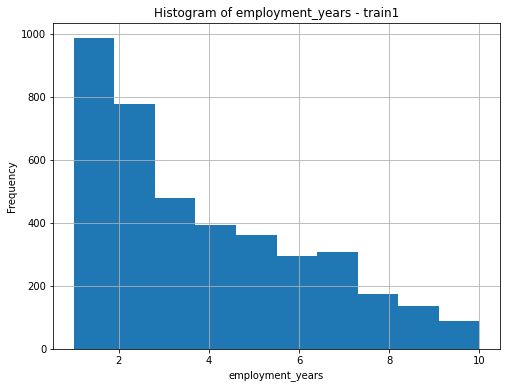

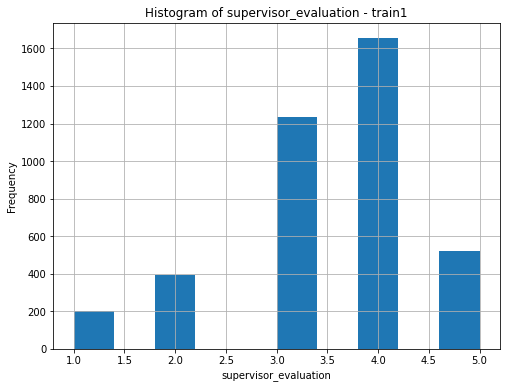

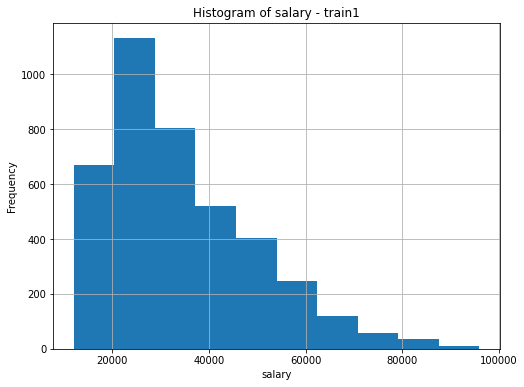

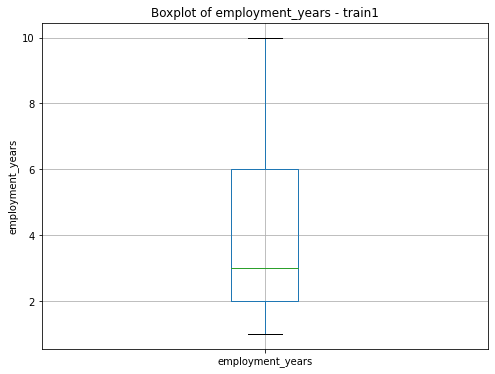

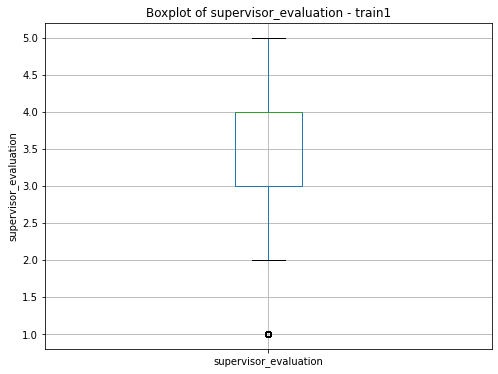

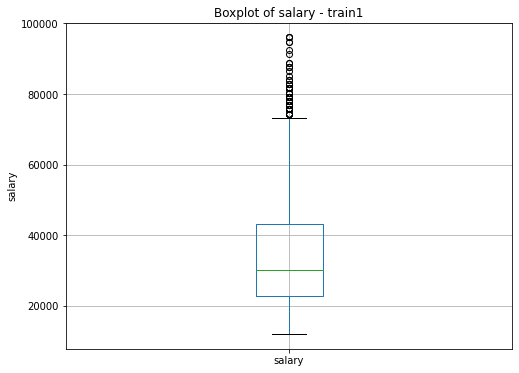

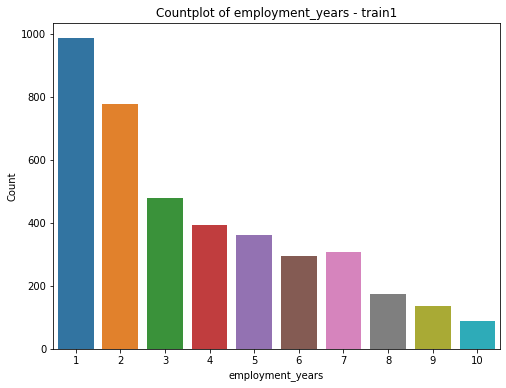

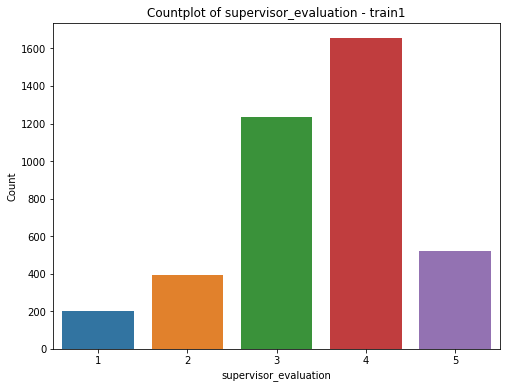

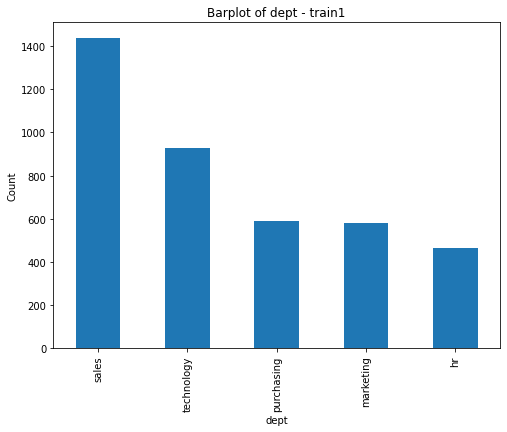

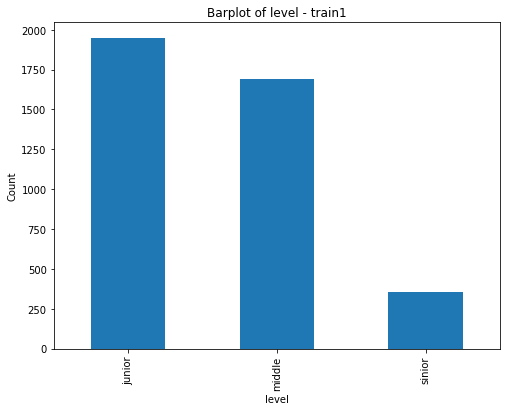

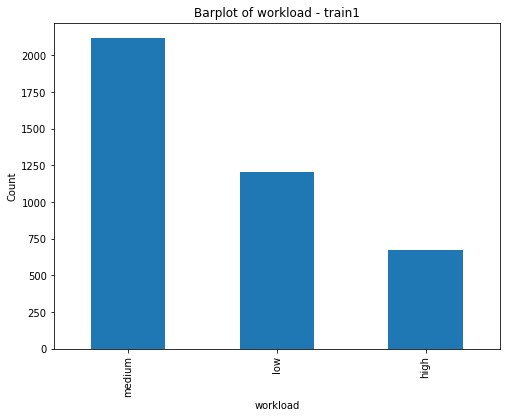

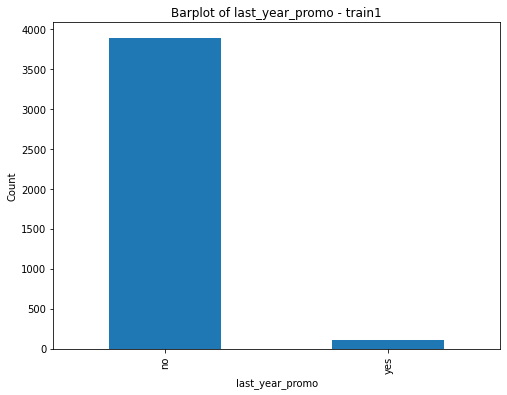

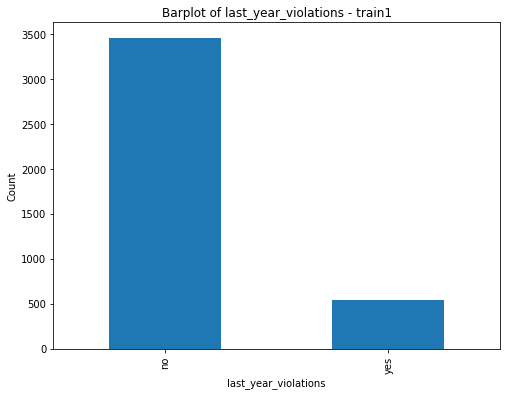

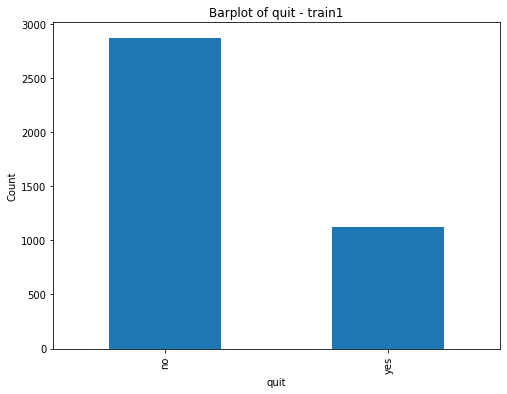

In [43]:
visualize_data(train1, 'train1')

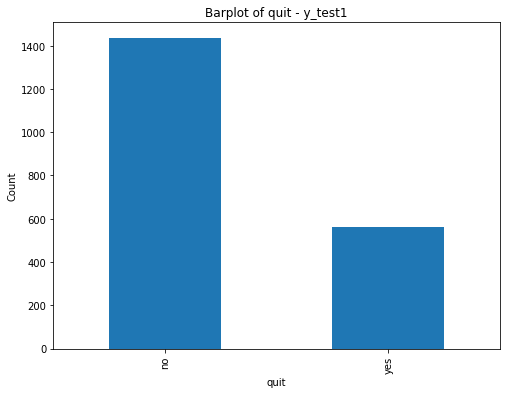

In [44]:
visualize_data(y_test1, 'y_test1')

interval columns not set, guessing: ['id', 'employment_years', 'supervisor_evaluation', 'salary']


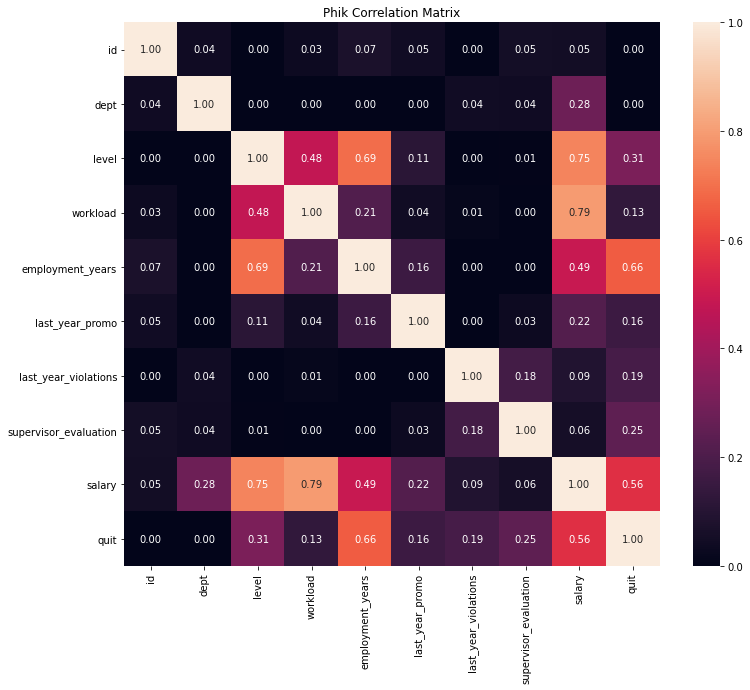

In [45]:
correlation_analysis(train1)

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь также будет здорово посмотреть на корреляцию признаков по тренировочной выборке (опять же, у нас новый `train` датасет).

</div>


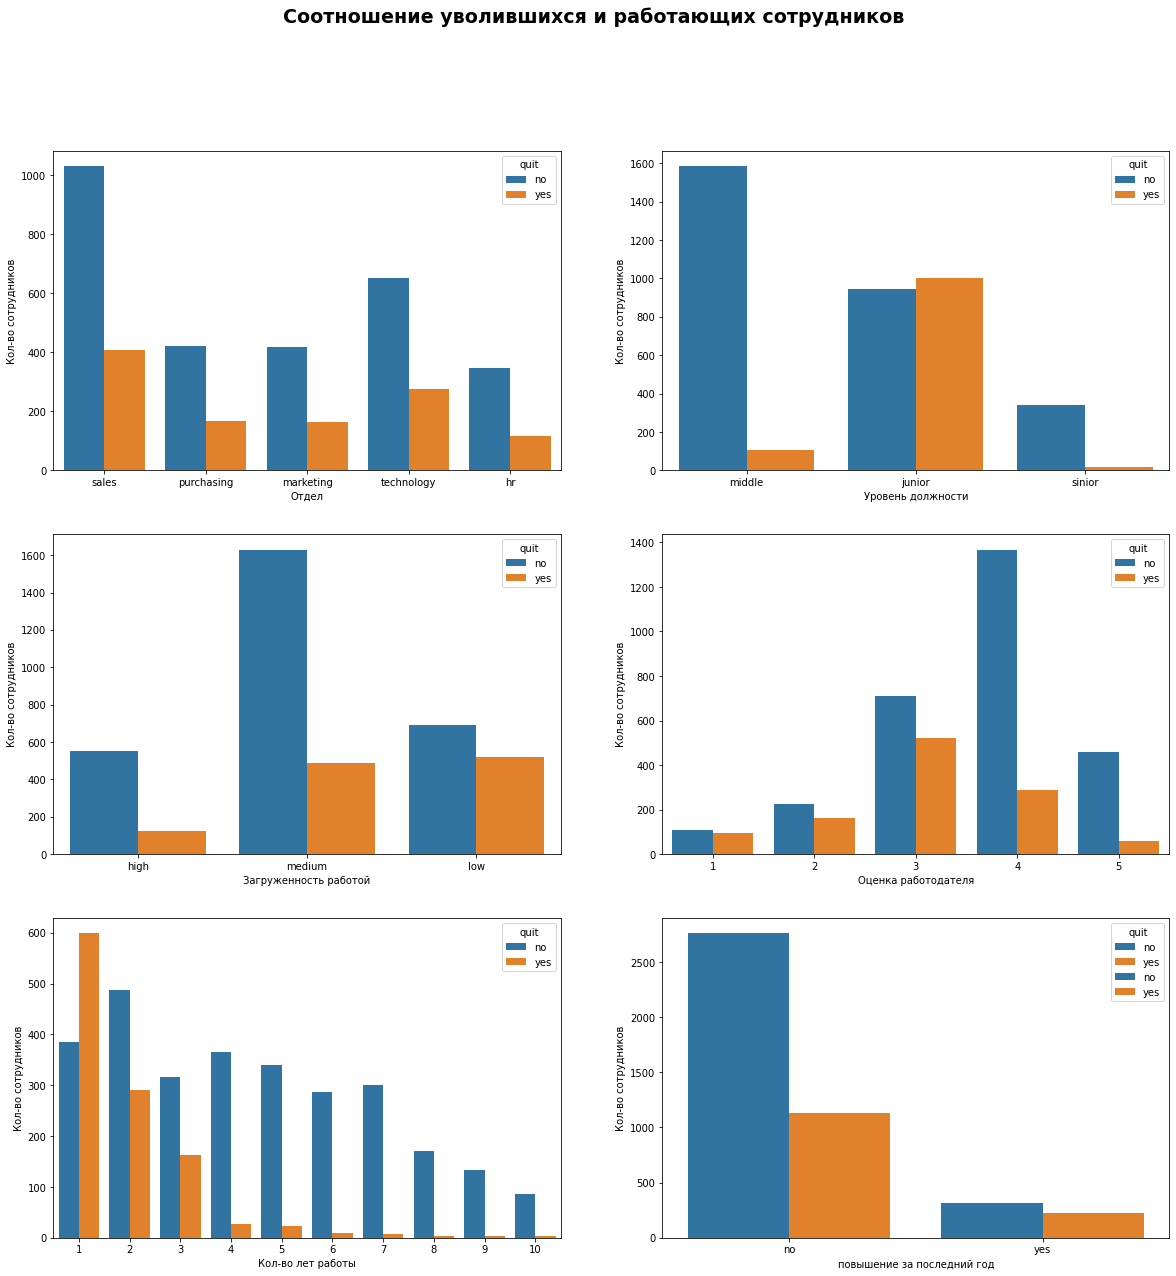

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
plt.suptitle('Соотношение уволившихся и работающих сотрудников', fontsize=19, fontweight='bold')
sns.countplot(x ='dept', data = train1, hue = 'quit',
             ax=axes[0,0]).set(xlabel='Отдел', ylabel='Кол-во сотрудников');
sns.countplot(x ='level', data = train1, hue = 'quit',
              ax=axes[0,1]).set(xlabel='Уровень должности', ylabel='Кол-во сотрудников');
sns.countplot(x ='workload', data = train1, hue = 'quit',
              ax=axes[1,0]).set(xlabel='Загруженность работой', ylabel='Кол-во сотрудников');
sns.countplot(x ='supervisor_evaluation', data = train1, hue = 'quit',
              ax=axes[1,1]).set(xlabel='Оценка работодателя', ylabel='Кол-во сотрудников');
sns.countplot(x ='employment_years', data = train1, hue = 'quit',
              ax=axes[2,0]).set(xlabel='Кол-во лет работы', ylabel='Кол-во сотрудников');
sns.countplot(x ='last_year_violations', data = train1, hue = 'quit',
              ax=axes[2,1]).set(xlabel='Нарушения трудового договора', ylabel='Кол-во сотрудников');
sns.countplot(x ='last_year_promo', data = train1, hue = 'quit',
              ax=axes[2,1]).set(xlabel='повышение за последний год', ylabel='Кол-во сотрудников');

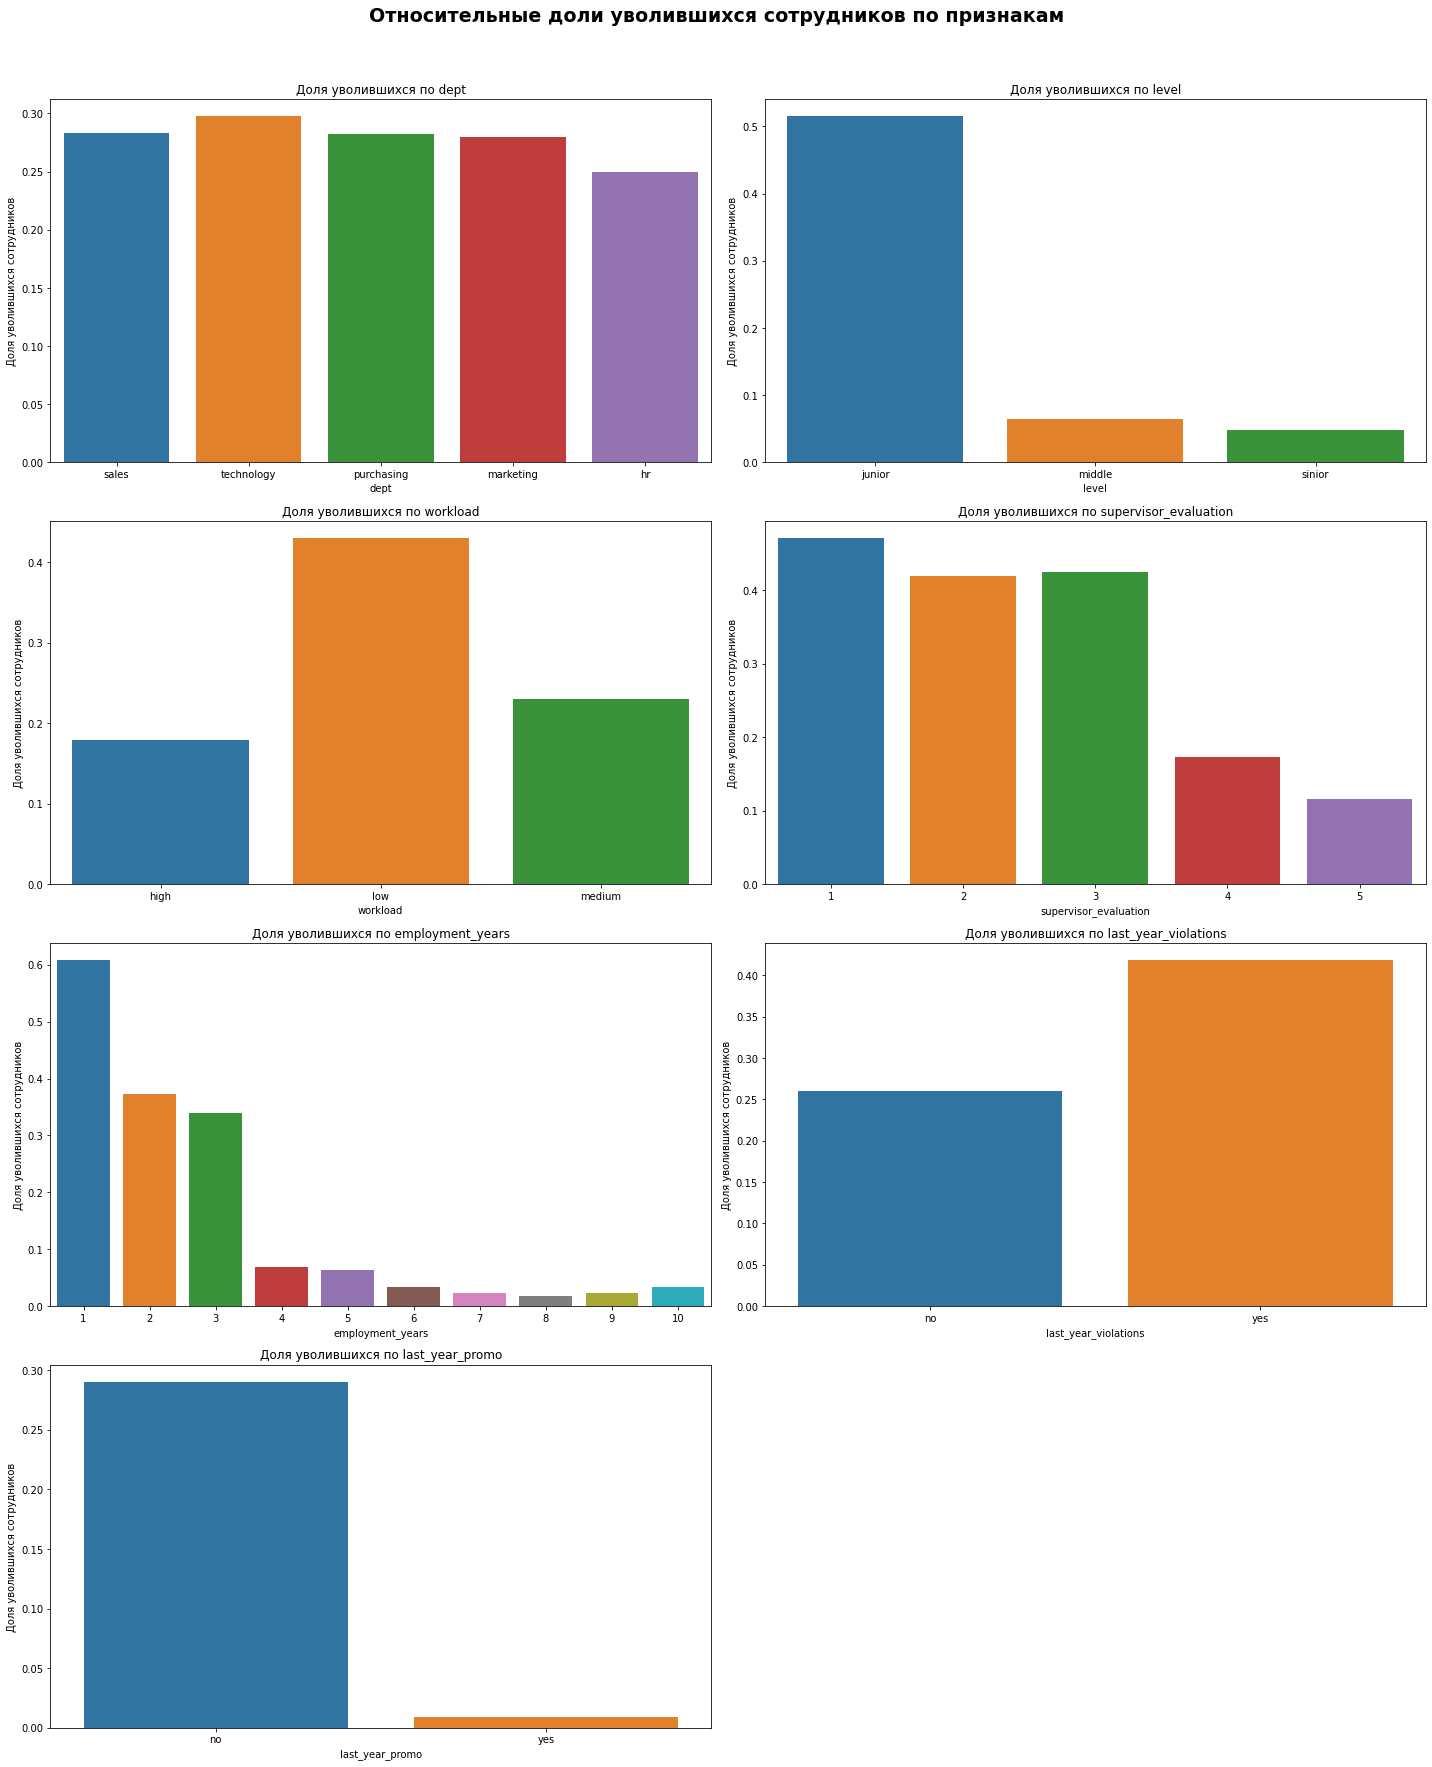

In [47]:
# Функция для расчета доли увольняющихся сотрудников
def calculate_quit_ratio(df, feature):
    ratio = df[df['quit'] == 'yes'][feature].value_counts() / df[feature].value_counts()
    return ratio

# Список признаков для анализа
features = ['dept', 'level', 'workload', 'supervisor_evaluation', 'employment_years', 'last_year_violations', 'last_year_promo']

# Создание субплотов
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
plt.suptitle('Относительные доли уволившихся сотрудников по признакам', fontsize=19, fontweight='bold')

# Строим графики для каждого признака
for idx, feature in enumerate(features):
    row, col = divmod(idx, 2)
    ratio = calculate_quit_ratio(train1, feature)
    sns.barplot(x=ratio.index, y=ratio.values, ax=axes[row, col]).set(
        xlabel=feature, ylabel='Доля уволившихся сотрудников'
    )
    axes[row, col].set_title(f'Доля уволившихся по {feature}')

# Удаляем лишнюю ячейку
fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

На основе графиков относительных долей увольняющихся сотрудников по признакам, можно сделать следующие выводы:

Отдел (dept):

Наибольшая доля увольняющихся сотрудников наблюдается в отделах purchasing (закупки), sales (продажи), и marketing (маркетинг). Это указывает на потенциальные проблемы в этих отделах, которые могут включать рабочие условия, удовлетворенность работой, или недостаток карьерных перспектив.

Уровень должности (level):

Уровень junior имеет самую высокую долю увольняющихся сотрудников. Это может свидетельствовать о том, что молодые специалисты на начальных позициях менее удовлетворены работой и карьерными перспективами или испытывают трудности с адаптацией.

Загруженность работой (workload):

Самая высокая доля увольняющихся сотрудников среди тех, кто имеет низкую загруженность (low). Это может указывать на то, что низкая нагрузка ассоциируется с отсутствием вызова или недостатком интересных задач.

Оценка работодателя (supervisor_evaluation):

Сотрудники с низкими оценками (1 и 2) чаще увольняются, что логично, так как низкая оценка может указывать на неудовлетворенность работой или конфликт с руководством. Примечательно, что даже сотрудники с оценкой 3 имеют значительную долю увольняющихся.

Количество лет работы (employment_years):

Наибольшая доля увольняющихся сотрудников наблюдается среди тех, кто работает в компании 1-2 года. Это свидетельствует о трудностях адаптации и, возможно, недостатке карьерных возможностей для новых сотрудников. Доля увольняющихся резко падает после 3 лет работы, что может указывать на то, что сотрудники, остающиеся более 3 лет, имеют высокую степень лояльности и удовлетворенности работой.

Нарушения трудового договора (last_year_violations):

Сотрудники, нарушавшие трудовой договор в прошлом году, значительно чаще увольняются, что подтверждает их низкую удовлетворенность работой и возможные конфликты с руководством.

Повышение в прошлом году (last_year_promo):

Практически все увольняющиеся сотрудники не получили повышения в прошлом году. Это указывает на важность карьерного роста и признания для удержания сотрудников.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошая визуализация👍 Позволяет наглядно определить факторы, по которым можно составить портрет уволевшегося сотрудника

</div>


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Однако отмечу, что оценивая расперделения данных для определения портрета более точным будет использовать не абсолютные, а относительные величины. `Например: 1000 работают в отделе hr и 100 из них уволилось, доля ушедших — 0.1; 100 работают в продажах и 50 из них уволилось, доля ушедших — 0.5. Портрет: увольняющийся сотрудник работает в продажах, важна именно доля.`
<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   При этом обрати внимание, что относительные величины нужно считать именно по срезу `quit='yes'`, а не делать анализ в разрезе `quit`: в случае, если у нас будет сильный дисбаланс целевого признака (например, 99/1), текущий формат анализа будет неинформативен, так как все доли оттока будут в где-то на дне графика.

</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Проработано👍

</div>

</div>


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Также обрати внимание, что признак `last_year_promo` не исследован.
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Проработано👍

</div>

</div>


In [48]:
full_data_quit = pd.concat([train1, y_test1], axis=0)

quit_workers = full_data_quit.query('quit == "yes"')
full_data_quit.shape

(6000, 10)

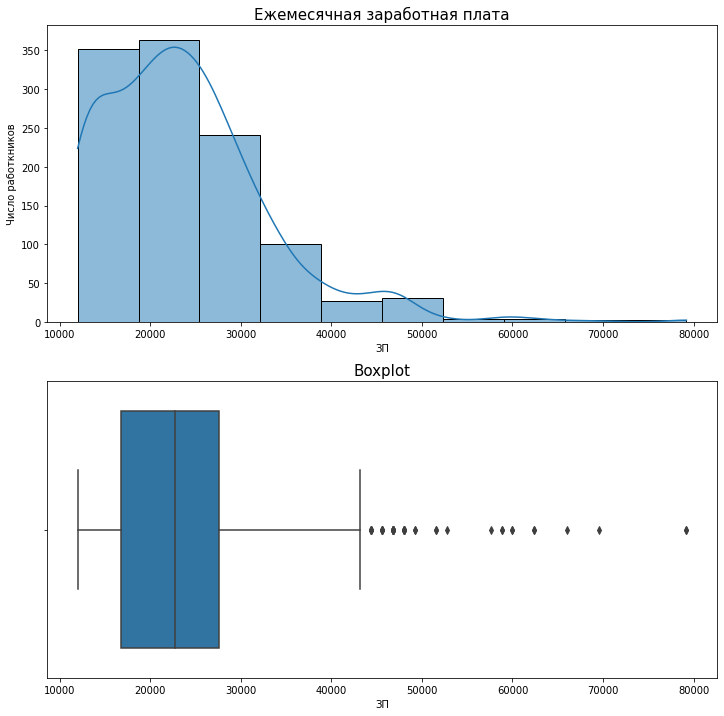

In [73]:
def hist_box_plotter(df, feature, title, xlabel, bins=20):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
    
    sns.histplot(df[feature], kde=True, bins=bins, ax=ax[0])
    ax[0].set_title(title, fontsize=15)
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel('Число работкников')
    
    sns.boxplot(x=df[feature], ax=ax[1])
    ax[1].set_title('Boxplot', fontsize=15)
    ax[1].set_xlabel(xlabel)
    plt.show()
hist_box_plotter(quit_workers, 'salary', 'Ежемесячная заработная плата', 'ЗП', 10)

средняя ежемесячная ЗП уволившихся - 10-20 тыс.

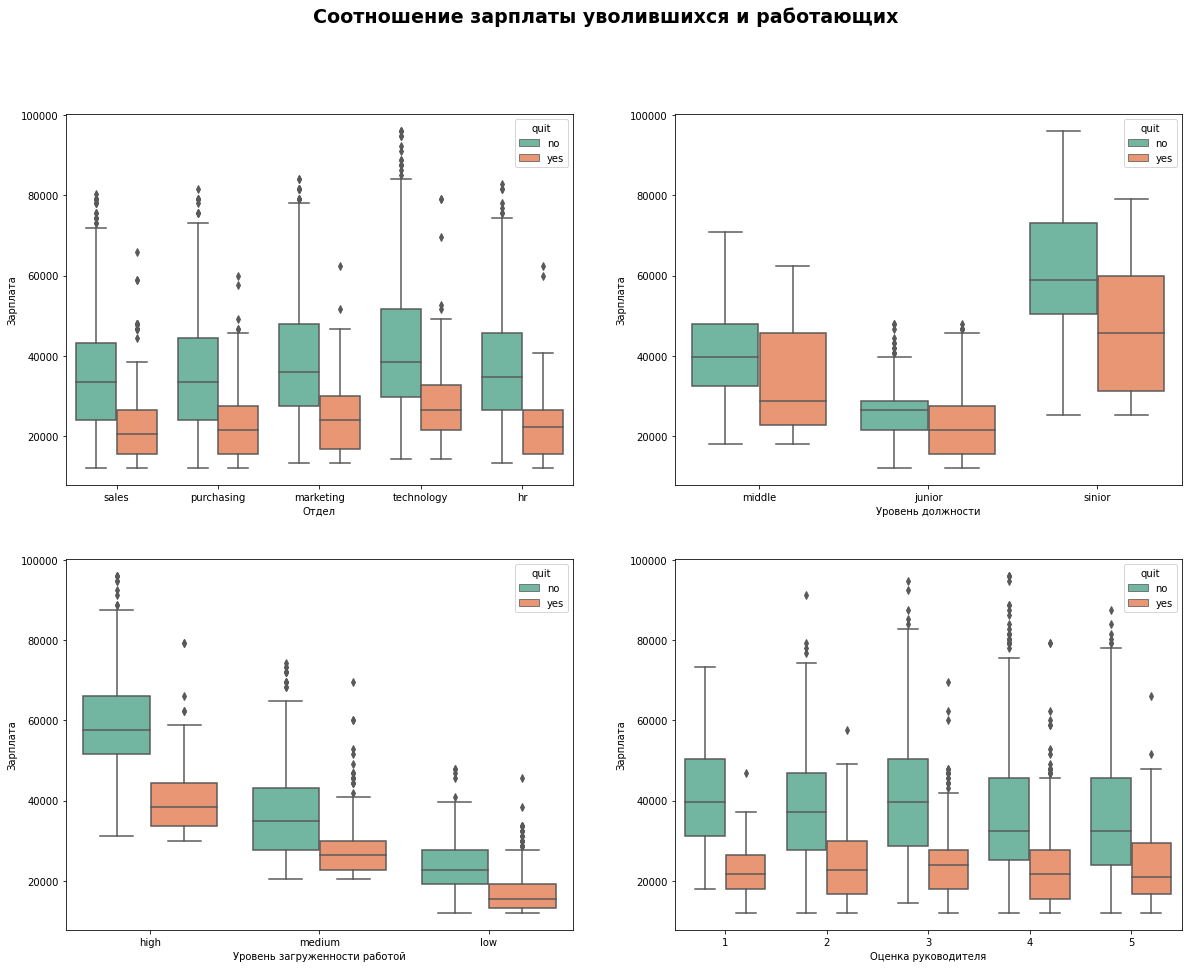

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))
plt.suptitle('Соотношение зарплаты уволившихся и работающих', fontsize=19, fontweight='bold')
sns.boxplot(x='dept', y='salary', hue='quit',
            palette='Set2', data=train1, ax=axes[0,0]).set(xlabel='Отдел', ylabel='Зарплата');
sns.boxplot(x='level', y='salary', hue='quit',
            palette='Set2', data=train1, ax=axes[0,1]).set(xlabel='Уровень должности', ylabel='Зарплата');
sns.boxplot(x='workload', y='salary', hue='quit',
            palette='Set2', data=train1, ax=axes[1,0]).set(xlabel='Уровень загруженности работой', ylabel='Зарплата');
sns.boxplot(x='supervisor_evaluation', y='salary', hue='quit',
            palette='Set2', data=train1, ax=axes[1,1]).set(xlabel='Оценка руководителя', ylabel='Зарплата');

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
1. Здесь вопрос - почему ты анализируешь зарплату в разрезе именно этих признаков, но не смотришь в разрезе оставльных? В целом, здесь было бы достаточно посмотреть и сравнить средние по зарплате.
2. Чтобы более точно и статистически обоснованно выполнить оценку, можно использовать статистический тест (например, `ttest`) для сравнения распределений в выборках.
</div>




In [50]:
data = y_test.merge(y_test1, on='id')
data = data.set_index('id')

In [51]:
data['job_satisfaction_rate'].value_counts()

0.70    49
0.67    48
0.65    47
0.75    47
0.68    47
        ..
0.05     2
0.99     2
0.03     1
0.96     1
0.04     1
Name: job_satisfaction_rate, Length: 98, dtype: int64

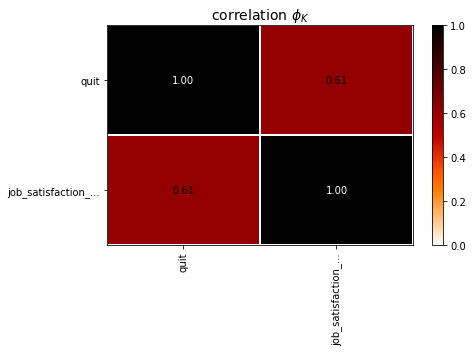

In [52]:
interval_cols = ['job_satisfaction_rate']
phik_overview = phik_matrix(data,interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='gist_heat_r',
    title=r'correlation $\phi_K$',

)

In [74]:
full_data_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   float64
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   float64
 8   salary                 4000 non-null   float64
 9   quit                   6000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 515.6+ KB


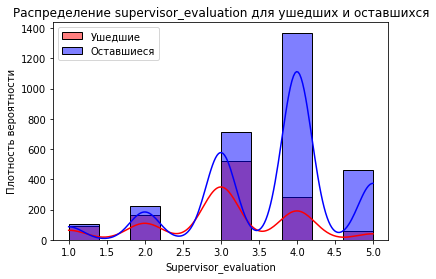

In [77]:
# Разделение данных на две группы: ушедшие и оставшиеся
quit_data = full_data_quit[full_data_quit["quit"] == "yes"]
stay_data = full_data_quit[full_data_quit["quit"] == "no"]

def plot_histogram(parameter):
    # Создание графика с помощью Seaborn
    sns.histplot(quit_data[parameter], bins=10, color='red', label='Ушедшие', kde=True)
    sns.histplot(stay_data[parameter], bins=10, color='blue', label='Оставшиеся', kde=True)

    # Настройка заголовка и меток осей
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Плотность вероятности')
    plt.title(f'Распределение {parameter} для ушедших и оставшихся')

    # Добавление легенды
    plt.legend()

    # Отображение графика
    plt.show()

plot_histogram('supervisor_evaluation')    

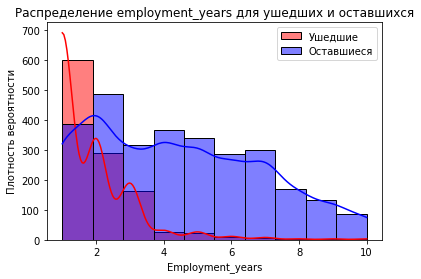

In [81]:
plot_histogram('employment_years')   

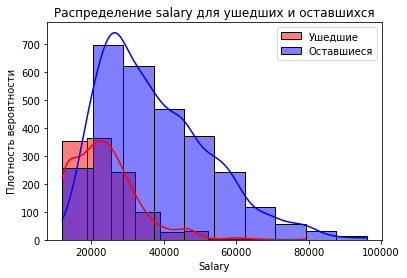

In [82]:
plot_histogram('salary') 

У большинство оставшихся зарплата немного выше чем у уволившихся. 

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   



   
   Помимо корреляции, необходимо рассмотреть и сравнить распределения удовлетворенности для ушедших и оставшихся работников, нужна нормированная гистограмма, так как сравниваемые выборки будут разных размеров - обычная частотная гистограмма тут не подойдёт. 
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Проработано👍

</div>
</div>




### Вывод

**Уровень должности и уровень загруженности работой:**

Сотрудники с уровнем должности "junior" и уровнем загруженности "low" наиболее подвержены увольнениям. Это может быть связано с их недостаточным удовлетворением от работы, отсутствием перспектив развития или низкими возможностями для проявления своих способностей.

**Оценки руководителя:**

Отмечается, что сотрудники с низкими оценками от руководителя (от 1 до 3) склонны к увольнениям. Это может быть следствием недовольства сотрудников своими руководителями, конфликтов в команде или недостаточной поддержки со стороны руководства.

**Стаж работы в компании:**

Новые сотрудники более склонны к увольнениям, что может быть связано с недостаточной адаптацией к корпоративной культуре, недопониманием ожиданий компании или неудовлетворенностью первым опытом работы.

**Заработная плата:**

Уволившиеся сотрудники в среднем имеют ниже средние зарплаты по сравнению с оставшимися. Это может указывать на то, что недовольство заработной платой может быть одной из причин увольнений.

**Исходя из графиков относительных долей увольняющихся сотрудников, можно сделать следующие выводы:**

- Отделы с наибольшей долей увольняющихся сотрудников: закупки, продажи и маркетинг. Это может указывать на проблемы в этих отделах, такие как недовольство условиями работы или ограниченные карьерные возможности.
- Самая высокая доля увольняющихся сотрудников среди специалистов на начальных позициях (junior). Это может свидетельствовать о неудовлетворенности работой и карьерными перспективами среди молодых специалистов.
- Низкая загруженность работы ассоциируется с более высокой долей увольнений. Это может свидетельствовать о недостатке интересных задач для сотрудников с низкой загруженностью.
- Сотрудники с низкими оценками работодателя, нарушавшие трудовые правила и не получившие повышения в прошлом году, чаще увольняются. Это подчеркивает важность удовлетворенности работой, признания и профессионального развития для удержания сотрудников.

На основе этих наблюдений можно сформулировать типичный профиль увольняющегося сотрудника как недавно принятого на должность "junior", имеющего низкий уровень загруженности работой, низкие оценки руководителя и низкую заработную плату. Этот анализ может быть полезен для выявления факторов, влияющих на увольнения сотрудников, и разработки стратегий по их удержанию в компании.

Дополнение тренировочной и тестовой выборок новым признаком "удовлетворенность работой" перед обучением моделей является важным шагом. Учитывая сильное влияние удовлетворенности работой на целевой признак (увольнение), включение этого признака в обучающие данные позволит моделям учитывать его в процессе прогнозирования.

Анализ данных позволил выделить типичный профиль увольняющегося сотрудника и выявить сильную корреляцию между уровнем удовлетворенности работой и увольнением. Это подтверждает важность включения удовлетворенности работой в модели машинного обучения для более точного прогнозирования увольнений и разработки эффективных стратегий удержания персонала.

Таким образом, добавление признака удовлетворенности работой в обучающие данные позволит моделям учесть этот важный аспект и повысить их способность к предсказанию увольнений сотрудников.

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   




   
   В целом, согласен. Можно также добавить, после изучения соотношений в относительных показателях, `сотрудники какого отдела более склонны к увольнениям?`

</div>


In [53]:
X_test['job_satisfaction_rate_pred'] = grid.best_estimator_.predict(X_test)
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate_pred
0,485046,marketing,junior,medium,2,no,no,5,28800,0.837297
1,686555,hr,junior,medium,1,no,no,4,30000,0.657826
2,467458,sales,middle,low,5,no,no,4,19200,0.664000
3,418655,sales,middle,low,6,no,no,4,19200,0.664000
4,789145,hr,middle,medium,5,no,no,5,40800,0.807978


In [54]:
train1['job_satisfaction_rate_pred'] = grid.best_estimator_.predict(train1.drop(['quit'], axis=1))
train1.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_pred
0,723290,sales,middle,high,2,no,no,4,54000,no,0.602105
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.837297
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.402143
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.813636


Вывод: Мы добавили новый входной признак в тестовую и тренировочную выборки и готовы к подготовке данных для обучения моделей.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо👍 Теперь в тренировочные и тестовые данные добавлен новый признак на основе предсказаний модели из задачи регрессии.

</div>


## Подготовка данных

In [55]:
train1 = train1.drop(['id'], axis=1)
train1.duplicated().sum()

1413

In [56]:
train1 = train1.drop_duplicates().reset_index(drop=True)
X_train1 = train1.drop(['quit'], axis=1)
y_train1 = train1['quit']
X_train1.shape

(2587, 9)

In [57]:
test1 = X_test.merge(y_test1, on='id')
X_test1_ = test1.drop(['quit','id'], axis=1)
y_test1_ = test1['quit']
X_test1_.shape

(2000, 9)

In [58]:
label_encoder = LabelEncoder()
y_train1 = label_encoder.fit_transform(y_train1)
y_test1_ = label_encoder.transform(y_test1_)

важно учитывать, что после добавления нового категориального признака "удовлетворенность работой" целевой признак также становится категориальным. Это означает, что для подготовки модели машинного обучения его необходимо кодировать.

Метод LabelEncoder является одним из способов кодирования категориальных переменных

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Согласен. Очень рад, что ты корректно используешь LabelEncoder

</div>


In [59]:
ohe_columns = [
    'last_year_violations',
    'last_year_promo',
    'dept'
]
ord_columns = [
    'level',
    'workload'
]
num_columns = ['salary', 'employment_years', 'supervisor_evaluation', 'job_satisfaction_rate_pred']

## Обучение моделей

In [84]:
pipe(ohe_columns, ord_columns, num_columns)

param_grid = [

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(4, 7),
        'models__max_features': range(6, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
    },

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
    },

    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            kernel = 'rbf',
            probability=True
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()],
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    n_iter=20,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['last_year_violations',
                                                                                'last_year_promo',
                                                                                'dept']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpl...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler()]}],
                   random_state=42, scoring='roc_auc')

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   У `SVC` нужно настроить `probability=True`: так как наша метрика `AUC-ROC` связана с вероятностями классов, модель должна также предсказывать вероятности. Это особенность конкретно модели `SVC`, стоит иметь это в виду.
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Проработано👍

</div>
</div>


In [85]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['last_year_violations',
                                                   'last_year_promo', 'dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                   

DecisionTreeClassifier(max_depth=5, max_features=7,
                                        random_state=42
                                        
Метрика лучшей модели на тренировочной выборке: 0.9058479682033573

In [62]:
pd.DataFrame(randomized_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__C,param_models,param_models__max_features,param_models__max_depth,param_models__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027967,0.002265,0.009159,0.000135,MinMaxScaler(),2.0,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.918953,0.889775,0.891726,0.897966,0.913496,0.902383,0.011748,3
1,0.019108,0.000588,0.008859,0.000155,MinMaxScaler(),NaN,DecisionTreeClassifier(random_state=42),7.0,6.0,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.901034,0.900074,0.883954,0.882893,0.917075,0.897006,0.012633,12
2,0.021509,0.003187,0.019995,0.003543,MinMaxScaler(),NaN,KNeighborsClassifier(),NaN,NaN,4.0,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.862056,0.859564,0.872721,0.866997,0.878310,0.867929,0.006871,20
3,0.019602,0.001444,0.008765,0.000491,MinMaxScaler(),NaN,DecisionTreeClassifier(random_state=42),8.0,6.0,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.898679,0.912536,0.872335,0.891790,0.912588,0.897586,0.014973,10
4,0.018542,0.000154,0.008640,0.000260,StandardScaler(),NaN,DecisionTreeClassifier(random_state=42),7.0,5.0,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.890338,0.897069,0.900744,0.911914,0.913243,0.902661,0.008768,1
5,0.018926,0.000467,0.008701,0.000287,MinMaxScaler(),NaN,DecisionTreeClassifier(random_state=42),7.0,5.0,NaN,"{'preprocessor__num': MinMaxScaler(), 'models_...",0.890338,0.897069,0.900744,0.911914,0.913243,0.902661,0.008768,1
6,0.078507,0.003126,0.024413,0.000324,StandardScaler(),NaN,SVC(random_state=42),NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.913929,0.889091,0.893288,0.890494,0.918078,0.900976,0.012413,8
7,0.025592,0.001133,0.008564,0.000065,StandardScaler(),1.0,"LogisticRegression(penalty='l1', random_state=...",NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.918659,0.889979,0.890964,0.897684,0.914172,0.902292,0.011918,4
8,0.018769,0.000246,0.008654,0.000131,StandardScaler(),NaN,DecisionTreeClassifier(random_state=42),6.0,6.0,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.897914,0.879985,0.888077,0.902354,0.899645,0.893595,0.008338,18
9,0.018430,0.000505,0.008390,0.000233,StandardScaler(),NaN,DecisionTreeClassifier(random_state=42),6.0,4.0,NaN,"{'preprocessor__num': StandardScaler(), 'model...",0.903615,0.890496,0.885961,0.879459,0.908935,0.893693,0.010985,16


После оптимизации гиперпараметров, лучшей моделью стала дерево решений с максимальной глубиной 5 и максимальным числом признаков для разбиения 7.

Теперь необходимо провести оценку производительности этой лучшей модели на тестовой выборке. Для этого мы рассчитаем метрику ROC_AUC.

In [86]:
y_test_proba = randomized_search.predict_proba(X_test1_)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test1_, y_test_proba)}')

Метрика ROC-AUC на тестовой выборке: 0.9106949712558525


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   По условию проекта метрика на `test` должна быть `>=0.91` - тут ты немного не дотянула. 
    
Если недобор несильный, можно сфокусироваться на поиске лучшей модели - лучше оптимизировать гиперпараметры или посмотреть на другие модели (можно попробовать случайный лес, если ты с ним знакома - он позволяет очень просто добрать нужную метрику).
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Проработано👍 Теперь значение метрики соответствует условию

</div>
</div>


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   После оценки качества модели на `test`  также стоит оценить адекватность лучшей модели, сравнив ее результат с результатом работы модели DummyClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier)

</div>




**Посмотрим на SHap**

In [93]:
X_train_transformed = pipe_final.named_steps['preprocessor'].fit_transform(X_train1)
X_test_transformed = pipe_final.named_steps['preprocessor'].transform(X_test1_)
explainer = shap.PermutationExplainer(randomized_search.best_estimator_.named_steps['models'].predict_proba, X_test_transformed)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
explainer.feature_names = feature_names
shap_values_ = explainer(X_test_transformed)
#shap.plots.bar(shap_values_[:,:,1], max_display=16)

PermutationExplainer explainer: 2001it [00:28, 46.14it/s]                          


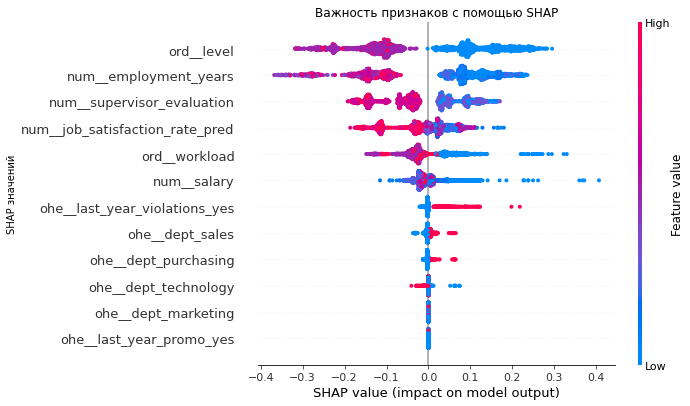

In [105]:
ax = plt.gca()

# Добавление подписей осей и названия графика
ax.set_ylabel('SHAP значений')
ax.set_xlabel('Признаки')
ax.set_title('Важность признаков с помощью SHAP')


shap.plots.beeswarm(shap_values_[:,:,1], max_display=16)


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Не забывай подписывать ось Y и название на графике. Так как `SHAP` график тоже является визуальным объектом, для его кастомизации мы можем использовать методы plt, как и для других графиков, однако это потребует небольшой настройки самого объекта `SHAP`. Подробнее можно глянуть тут: https://github.com/shap/shap/issues/594.
<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Проработано👍

</div>
</div>


### Вывод

Из проведенного анализа важности признаков для нашей модели стало ясно, что наибольший вклад в прогнозирование уровня удовлетворенности сотрудника вносит признак "level". Это может указывать на важность уровня должности для определения уровня удовлетворенности.

С другой стороны, признаки "повышение сотрудника", "нарушение трудового договора" и "отдел" кажутся менее важными для нашей модели. Возможно, это связано с тем, что эти признаки имеют меньший вес или менее существенное влияние на уровень удовлетворенности сотрудника по сравнению с другими факторами.

Лучшей моделью для этой задачи оказалось дерево решений.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   

   В целом, мы можем попробовать удалить незначимые признаки и построить модель без их учета. Возможно, это улушит результат. По крайней мере, обучение будет происходить быстрее. 

</div>




## Выводы


В процессе нашей исследовательской работы мы сосредоточились на разработке модели для снижения уровня текучести кадров в организации "Х".

**Начнем с первой задачи**, в рамках которой мы строили модель для прогнозирования уровня удовлетворенности сотрудников на основе предоставленных данных. На этом этапе мы провели загрузку и анализ данных, выявив пропущенные значения в некоторых категориальных признаках. После этого мы выполнили предварительную обработку данных, включая заполнение пропусков и проверку наличия аномалий. Исследовательский анализ данных позволил нам лучше понять распределение переменных и выявить корреляционные зависимости. Далее мы приступили к подготовке данных, включая кодирование категориальных признаков, их масштабирование и дальнейшую обработку с использованием пайплайна. Для обучения модели мы выбрали два подхода: линейную регрессию и дерево решений, и выбрали наилучшую модель на основе метрики SMAPE.

**Вторая задача**, которую мы решали, заключалась в построении модели для прогнозирования факта увольнения сотрудника. Мы загрузили новые данные и провели их предварительную обработку, включая анализ распределения нового признака "Увольнение" и выявление важных зависимостей с другими переменными. Добавив новый признак удовлетворенности работой в тренировочную и тестовую выборки, мы провели аналогичные шаги по подготовке данных, как и в первой задаче. Для решения задачи бинарной классификации мы использовали несколько моделей, включая логистическую регрессию, метод опорных векторов, KNN и дерево решений. Выбор лучшей модели был основан на метрике ROC_AUC.

Общие рекомендации для заказчика включают в себя активное внимание к удовлетворенности сотрудников, их продвижение по карьерной лестнице и обеспечение их более высокой загрузкой работой, что может снизить вероятность увольнения.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Мадина, проведено основательное и подробное исследование. Радует, что структура работы соблюдена, работа выполнена последовательно. Выводы очень подробные - рекомендации для заказчика понятны и аргументированы. Работа с моделями выполнена качественно. Здорово, что разобралась с использованием пайплайнов!
    Я добавил несколько рекомендаций по сравнению качества работы лучших моделей с DummyRegressor и DummyClassifier для решения задач регрессии и классификации соответственно. Также можно попробовать провести дополнительное построение модели классификации без учета незначимых признаков.
    Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!
</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Мадина, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>